In [ ]:
# Install required libraries
!pip install lime scikit-image

In [2]:
# Import necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing.image import load_img

In [3]:
# Load the pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Load and prepare the image (replace 'cat.jpg' with your image path)
img_path = 'cat.jpg'  # Assume the image is uploaded to Colab
img = load_img(img_path, target_size=(224, 224))
img_array = np.array(img)  # Shape (224, 224, 3), dtype uint8

In [5]:
# Make prediction
img_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(img_array.astype(np.float32)[np.newaxis, ...])
preds = model.predict(img_preprocessed)
decoded_preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=3)[0]
print("Top predictions:", decoded_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top predictions: [('n02123159', 'tiger_cat', np.float32(0.8026814)), ('n02123045', 'tabby', np.float32(0.06623574)), ('n02124075', 'Egyptian_cat', np.float32(0.030283561))]


In [6]:
# Define the classifier function for LIME
def classifier_fn(images):
    images = tf.keras.applications.mobilenet_v2.preprocess_input(images.astype(np.float32))
    return model.predict(images)

In [7]:
# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

In [8]:
# Generate explanation
explanation = explainer.explain_instance(img_array, classifier_fn, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━

In [9]:
# Visualize the explanation for the top label
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)

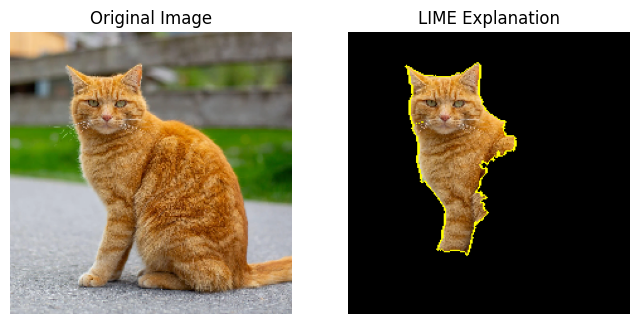

In [10]:
# Plot original image and LIME explanation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title('LIME Explanation')
plt.axis('off')
plt.show()

In [ ]:
# Step 1: Install required libraries
# Installs necessary packages for model loading, XAI techniques, and advanced visualizations
!pip install lime shap scikit-image matplotlib seaborn tensorflow

In [46]:
# Step 2: Import libraries
# Imports libraries for TensorFlow model, image processing, LIME, and visualizations
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In [47]:
# Step 3: Load pre-trained MobileNetV2 model
# Loads MobileNetV2, a lightweight model pre-trained on ImageNet for image classification
model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

In [48]:
# Step 4: Load and preprocess image
# Loads an image, resizes to 224x224, and preprocesses it for MobileNetV2
img_path = 'cat.jpg'  # Replace with your image path (upload to Colab)
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)  # Shape: (224, 224, 3)
img_preprocessed = preprocess_input(img_array.astype(np.float32)[np.newaxis, ...])  # Shape: (1, 224, 224, 3)

In [49]:
# Step 5: Make predictions
# Runs the image through the model to get class probabilities and decodes top 3 predictions
preds = model.predict(img_preprocessed)
decoded_preds = decode_predictions(preds, top=3)[0]
print("Top Predictions:")
for i, pred in enumerate(decoded_preds, 1):
    print(f"{i}. {pred[1]}: {pred[2]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Top Predictions:
1. tiger_cat: 80.27%
2. tabby: 6.62%
3. Egyptian_cat: 3.03%


In [50]:
# Step 6: Define classifier function for LIME
# Creates a function that LIME uses to get predictions from the model for perturbed images
def classifier_fn(images):
    processed_images = preprocess_input(images.astype(np.float32))
    return model.predict(processed_images)

In [53]:
# Step 7: Generate LIME explanations with multiple feature levels
# Uses LIME to identify key image regions (superpixels) for the top prediction
explainer_lime = lime_image.LimeImageExplainer()
explanation_lime = explainer_lime.explain_instance(
    img_array,
    classifier_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# Get LIME masks for different numbers of features (for enhanced visualization)
temp_few, mask_few = explanation_lime.get_image_and_mask(
    explanation_lime.top_labels[0],
    positive_only=True,
    num_features=3,  # Fewer features for a focused explanation
    hide_rest=True
)
temp_many, mask_many = explanation_lime.get_image_and_mask(
    explanation_lime.top_labels[0],
    positive_only=True,
    num_features=10,  # More features for a detailed explanation
    hide_rest=True
)

# Create a heatmap overlay for LIME weights
weights = explanation_lime.local_exp[explanation_lime.top_labels[0]]
segments = explanation_lime.segments
heatmap = np.zeros_like(segments, dtype=np.float32)
for seg_id, weight in weights:
    heatmap[segments == seg_id] = weight
heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)  # Normalize for visualization

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

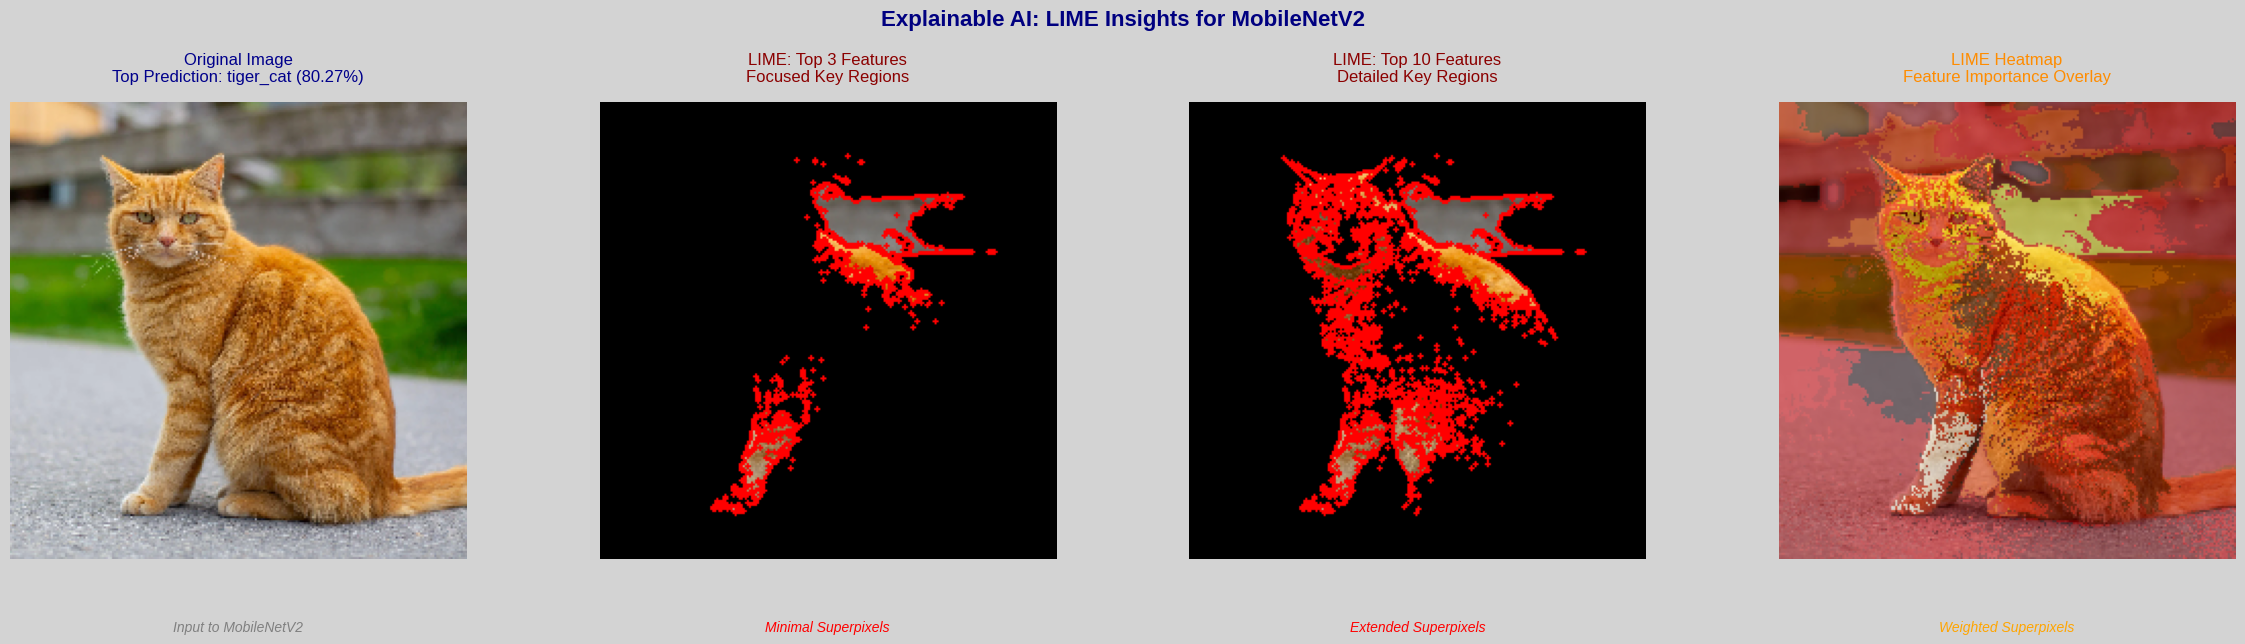

In [54]:

# Step 8: Create advanced visualizations
# Designs a creative, four-panel layout with original image, LIME explanations, and heatmap
plt.style.use('seaborn-v0_8')  # Use legacy Seaborn style to fix 'seaborn' error
fig = plt.figure(figsize=(24, 6), facecolor='lightgray')

# Original Image with Prediction Overlay
plt.subplot(1, 4, 1)
plt.imshow(img_array / 255.0)
plt.title(
    f'Original Image\nTop Prediction: {decoded_preds[0][1]} ({decoded_preds[0][2]*100:.2f}%)',
    fontsize=12,
    pad=15,
    color='darkblue'
)
plt.axis('off')
plt.gca().set_facecolor('#f0f0f0')
plt.text(
    0.5, -0.15, 'Input to MobileNetV2',
    ha='center', va='center', transform=plt.gca().transAxes,
    fontsize=10, color='gray', fontstyle='italic'
)

# LIME Explanation (Few Features)
plt.subplot(1, 4, 2)
lime_vis_few = mark_boundaries(temp_few / 255.0, mask_few, color=(1, 0, 0), mode='thick')
plt.imshow(lime_vis_few)
plt.title(
    'LIME: Top 3 Features\nFocused Key Regions',
    fontsize=12,
    pad=15,
    color='darkred'
)
plt.axis('off')
plt.gca().set_facecolor('#f0f0f0')
plt.text(
    0.5, -0.15, 'Minimal Superpixels',
    ha='center', va='center', transform=plt.gca().transAxes,
    fontsize=10, color='red', fontstyle='italic'
)

# LIME Explanation (Many Features)
plt.subplot(1, 4, 3)
lime_vis_many = mark_boundaries(temp_many / 255.0, mask_many, color=(1, 0, 0), mode='thick')
plt.imshow(lime_vis_many)
plt.title(
    'LIME: Top 10 Features\nDetailed Key Regions',
    fontsize=12,
    pad=15,
    color='darkred'
)
plt.axis('off')
plt.gca().set_facecolor('#f0f0f0')
plt.text(
    0.5, -0.15, 'Extended Superpixels',
    ha='center', va='center', transform=plt.gca().transAxes,
    fontsize=10, color='red', fontstyle='italic'
)

# LIME Heatmap Overlay
plt.subplot(1, 4, 4)
plt.imshow(img_array / 255.0)
plt.imshow(heatmap, cmap='hot', alpha=0.5)
plt.title(
    'LIME Heatmap\nFeature Importance Overlay',
    fontsize=12,
    pad=15,
    color='darkorange'
)
plt.axis('off')
plt.gca().set_facecolor('#f0f0f0')
plt.text(
    0.5, -0.15, 'Weighted Superpixels',
    ha='center', va='center', transform=plt.gca().transAxes,
    fontsize=10, color='orange', fontstyle='italic'
)

# Final Adjustments and Display
plt.tight_layout(pad=3.0)
plt.suptitle(
    'Explainable AI: LIME Insights for MobileNetV2',
    fontsize=16, y=1.05, weight='bold', color='navy'
)
plt.show()